In [2]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:
# Let's draw one random number
x = np.random.random_sample()
print(x)

0.6540206871210011


In [4]:
np.random.seed(0)
x = np.random.random_sample(5)
print(x)
x = np.random.random_sample(5)
print(x)

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
[0.64589411 0.43758721 0.891773   0.96366276 0.38344152]


In [5]:
a=5
b=20
x = np.random.random_sample(10000)
y = (b-a)*x+a
print(y)

[16.87587557 12.9334238  13.52066842 ... 10.58037146  7.94258142
 17.10788368]


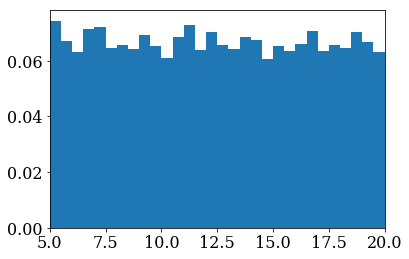

In [6]:
binwidth=0.5
plt.xlim(5,20)
plt.hist(y,bins=np.arange(5.,21., binwidth),normed=True);

### Generation of other random distributions

ditributions habituelles:
1) Gaussienne : $$p(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-0.5(\frac{x-\mu}{\sigma})^2}$$
2)exponentielle: $$x\leq 0 \quad p(x)=\alpha e^{-\alpha x}$$ $$x<0 \quad p(x)=0$$ 

Si les ditributions cumulatives sont connues et inversibles, on eput alors reproduire le générateur aléatoire correspondant en utilisant un générateur aléatoire uniforeme sur $[0,1]$. 

ex. distribution exponentielle: $$
F(x) =
\begin{cases} 
1 - e^{-\alpha x} &\mbox{for } x\geq 0 \\
0 &\mbox{if } x<0
\end{cases} 
$$

For $x\in [0, 1]$, the inverse of this distribution is thus,

$$
F^{-1}(x) = -\frac{1}{\alpha}\log(1-x).
$$

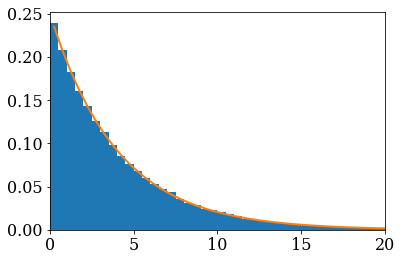

In [7]:
#on implémente le tout
alpha = 0.25 #vitesse de notre distribution
x =  np.random.random_sample(100000)
y = -1/alpha*np.log(1-x)

#plot
binwidth=0.5
plt.xlim(0,20)
bins=np.arange(0.,21., binwidth)
plt.hist(y, bins, normed =True);

#compute centers of bins
xc = bins[:-1] + binwidth/2
plt.plot(xc, alpha*np.exp(-alpha*xc), lw=2)

### Von Neumann rejection method

on génère un set de nb aléatoires avec une certaine distribution p1 et on extrait ce qui obéit à p2. Pour cela il faut que $$p_2(x) \leq Kp_1(x) \quad \forall x $$

example: gaussienne positive, commençons par une exponentielle avec $\alpha=1$

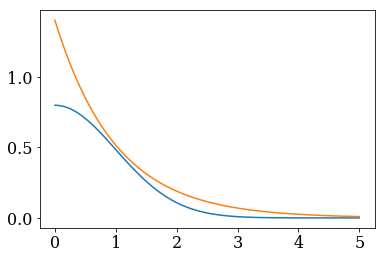

In [8]:
nx = 100

xi = np.linspace(0,5,nx)

f1=2*np.exp(-xi**2/2.0)/np.sqrt(2*np.pi)
f2=1.4*np.exp(-np.abs(xi))

plt.plot(xi,f1)
plt.plot(xi,f2)


fonctionnement de l'algorithme: 
1. on génère un nb x selon notre distribution exponentielle
2. on tire un nb au hasard U entre 0 et 1
3. on garde x si $U< \frac{p_2(x)}{Kp_1(x)}$



Size of accepted set h and expected size 1/K: 71370 71428.57142857143


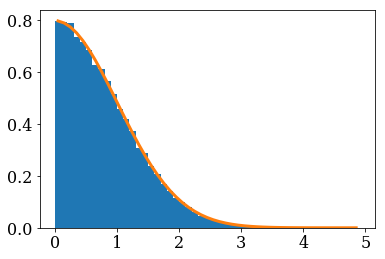

In [9]:
#nb de VA prises selon p1
N = 100000
K = 1.4

h=[]

for i in range(N):
    u1= np.random.random_sample()
    
    #distribution de g selon une exponentielle
    g = np.log(1/(1-u1))
    
    #on génère un 2e nb pour la cond d'accept/reject
    u2 = np.random.random_sample()
    
    #tri
    ratio = 2*np.exp(-g**2/2.0)/np.sqrt(2*np.pi)/ \
            (K*np.exp(-g))
        
    if (u2<ratio):
        h.append(g)
        
#size of the accepted set
print("Size of accepted set h and expected size 1/K:", len(h), N/K)

#plots
binwidth=0.1
bins=np.arange(0.,5.,binwidth)
plt.hist(h, bins=np.arange(0.,5.,binwidth), normed=True);

#center of bins
xc = bins[:-1] + binwidth/2
plt.plot(xc, 2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi), lw=3)

Acceptance ratio: 0.71551


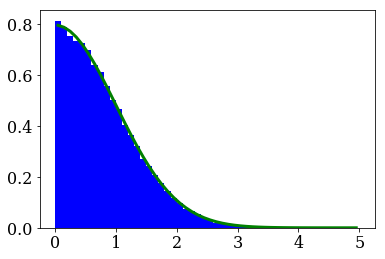

In [10]:
# Distribute g according to the exponential distribution
uniform1 = np.random.random_sample(N)
g = np.log(1/(1-uniform1))

# Probabilty of drawing g according to the exponential distribution
p_g_exp = np.exp(-g)

# Probability of drawing g according to the (positive) normal distribution
p_g_gauss = 2.0*np.exp(-g**2/2.0)/np.sqrt(2*np.pi)

# Draw a second uniform distribution for the acceptance
uniform2 = np.random.random_sample(N)

# Create acceptance mask
condition = uniform2 < p_g_gauss / (1.4*p_g_exp )

# Extract the accepted random numbers
h = np.extract(condition,g)

# Print the acceptance ratio
print("Acceptance ratio:",h.size/g.size)

# Plots
binwidth=0.1
bins=np.arange(0.,5.1, binwidth)
plt.hist(h,bins,normed='true',color='blue');

# Compute centers of bins
xc = bins[:-1] + binwidth/2
plt.plot(xc,2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi),lw=3,color='green')


### Challenge

1) Regardez la librairie python sur les générateurs de nombres aléatoires et testez-en qq un. En particulier comparez le output de l'exponentielle et de la gaussienne avec les versions implémentées ci-dessus.

2) Une autre methode pour générer des nombres pour la gaussienne c'est l'algorithme de Box-Muller. Implémentez-le et testez-le.

9.681918505848799


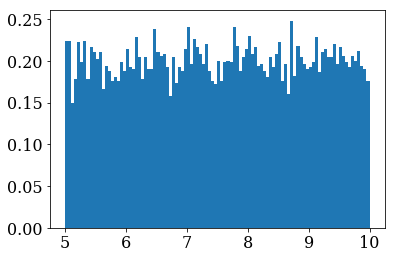

In [26]:
x=np.random.uniform(5,10)
print(x)

h=plt.hist(np.random.uniform(5,10,10000), bins=100, normed=True)
plt.show()

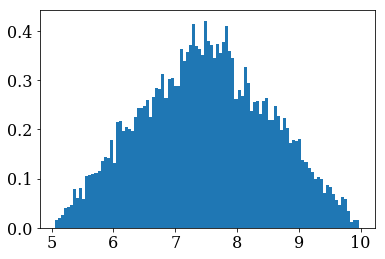

In [28]:
x=np.random.triangular(5, 7.5, 10,10000)



h=plt.hist(np.random.triangular(5,7.5,10,10000), bins=100, normed=True)
plt.show()

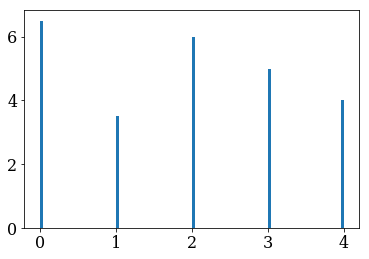

In [41]:
a=np.random.random_sample()
h=plt.hist(np.random.choice(5,100), bins=100, normed=True)
plt.show()

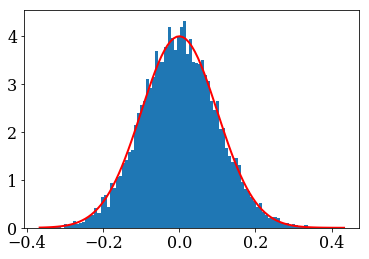

In [52]:
mu, sigma =0,0.1

gauss=np.random.normal(mu,sigma,10000)

#plots
count, bins, ignored=plt.hist(gauss, bins=100, normed=True)
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2 / (2*sigma**2)), linewidth=2, color='r')
plt.show()
#center of bins
#xc = bins[:-1] + binwidth/2
#plt.plot(xc, 2*np.exp(-xc**2/2.0)/np.sqrt(2*np.pi), lw=3)

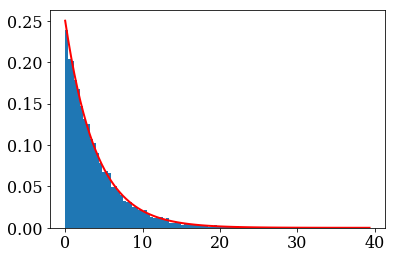

In [54]:
exp=np.random.exponential(4,10000)

#plots
count, bins, ignored=plt.hist(exp, bins=100, normed=True)
plt.plot(bins, 1/4*np.exp(-bins / 4), linewidth=2, color='r')
plt.show()